#Deep Learning con Python
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

En esta sección, creará una red para clasificar los canales de noticias de Reuters en 46 temas mutuamente excluyentes. Debido a que tiene muchas clases, este problema es una instancia de clasificación multiclase

In [51]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

#ejemplos de entrenamiento son una lista de enteros correspondientes a un diccionario de palabras
#las etiquetas son un entero correspondiente a cada categoria de 0 a 45

print(len(train_data))
print(len(test_data))

8982
2246


In [ ]:
type(train_data[10])
train_data[10]

###Para decodificar las noticias

In [ ]:
world_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in world_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_newswire

###Preparar los datos

In [52]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension)) #creamos un array con la de nx10000 por ejemplo una noticia de 31 palabras genera un vector de 31x10000
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1                      #colocamos 1 en cada fila de 10000 ceros en la posicion de la palabra por ejemplo 341 seria una fila de ceros                                         
  return results                               #con un 1 en la posicion 341 y asi con las demas palabras por cada fila

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

x_train[1]
sum(x_train[1]) #este contenia 43 palabras por ello un uno por cada palabra 

43.0

Para vectorizar las etiquetas, hay dos posibilidades: puede convertir la lista de etiquetas como un tensor de enteros, o puede usar la codificación de un one-hot.

In [53]:
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label]=1
  return results

y_train=to_one_hot(train_labels)
y_test=to_one_hot(test_labels)

#one-hot dara como resultado algo similar a la vectorizacion anterior, pero con solo un uno ya que es la posicion de un solo entero
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

####tambien hay una forma integrada en keras de hacerlo (opcional)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

one_hot_train_labels[0]

###Estructuracion de la red

In [58]:
from keras import models,layers

net=models.Sequential()
net.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
net.add(layers.Dense(64,activation='relu'))
net.add(layers.Dense(46,activation='softmax'))

In [59]:
#compilacion del modelo
net.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [60]:
#separamos en conjuntos de entrenamiento y validación
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=y_train[:1000]
partial_y_train=y_train[1000:]

print(len(x_val)) #1000
print(len(partial_x_train)) #7982

1000
7982


###Entrenamiento de la red

In [ ]:
history=net.fit(partial_x_train,partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))


In [30]:
history.history.keys() #las metricas que visualizaremos

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

### Trazando la pérdida de entrenamiento y validación


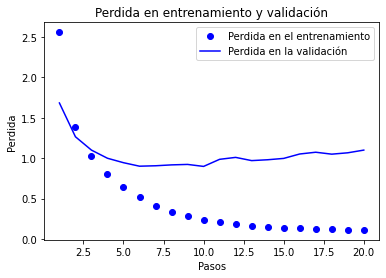

In [28]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Perdida en el entrenamiento')
plt.plot(epochs,val_loss,'b',label='Perdida en la validación')
plt.title('Perdida en entrenamiento y validación')
plt.xlabel('Pasos')
plt.ylabel('Perdida')
plt.legend()
plt.show()


In [ ]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

plt.plot(epochs,accuracy,'bo',label='Precisión en el entrenamiento')
plt.plot(epochs,val_accuracy,'b',label='Precisión en la validación')
plt.title('Precisión en entrenamiento y validación')
plt.xlabel('Pasos')
plt.ylabel('Precisión')
plt.legend()
plt.show()

Podemos observar que hay sobreentrenamiento a partir de +- la 9'no paso o epoch,
reentrenaremos de nuevo una red

In [70]:
net=models.Sequential()
net.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
net.add(layers.Dense(64,activation='relu'))
net.add(layers.Dense(46,activation='softmax'))

net.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
net.fit(partial_x_train,partial_y_train,
                  epochs=9,
                  batch_size=512,
                  validation_data=(x_val,y_val))
results=net.evaluate(x_test,y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 132us/step - loss: 2.4446 - accuracy: 0.5311 - val_loss: 1.5880 - val_accuracy: 0.6620
Epoch 2/9
7982/7982 [==============================] - 1s 125us/step - loss: 1.3261 - accuracy: 0.7144 - val_loss: 1.2384 - val_accuracy: 0.7290
Epoch 3/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.9903 - accuracy: 0.7864 - val_loss: 1.0752 - val_accuracy: 0.7650
Epoch 4/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.7686 - accuracy: 0.8384 - val_loss: 0.9902 - val_accuracy: 0.7970
Epoch 5/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.6014 - accuracy: 0.8738 - val_loss: 0.9411 - val_accuracy: 0.8120
Epoch 6/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.4678 - accuracy: 0.9013 - val_loss: 0.9002 - val_accuracy: 0.8170
Epoch 7/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.379

In [71]:
results  #precisin de +- 80%

[0.998341677768466, 0.7876224517822266]

In [ ]:
#linea de base aleatoria
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

###Predicciones


In [43]:
predictions=net.predict(x_test)

In [44]:
predictions[0].shape

(46,)

In [45]:
#la suma de probabiliadades suma 1
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax(predictions[0]) #retorna el indice de la prediccion con mayor probabilidad